# Análisis departamento de Experiencia del Cliente

## Cargar dataset df_tourist_python_sprint3.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_tourist = pd.read_csv("df_tourist_python.csv", sep= ';')

df_tourist

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2.0,1.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,2018-07-31
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.0,1.0,...,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,2020-01-10
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,2019-07-29
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.0,1.0,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,2020-01-10
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,2019-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,47710189,Beautiful house in the centre in Santa Cristin...,Beautiful house in the center of Santa Cristin...,263841355,Santa Cristina d'Aro,NaN,Entire home/apt,8,2.0,4.0,...,100.0,100.0,100.0,100.0,90.0,VERDADERO,25.0,spain,girona,2021-01-31
9646,47752964,Costa Brava - Palafrugell - playa y monta�a,Piso con acceso directo a piscina. Lugar muy t...,282214688,Palafrugell,NaN,Entire home/apt,7,2.0,3.0,...,100.0,100.0,100.0,100.0,90.0,FALSO,25.0,spain,girona,2021-02-27
9647,47792016,MODERN AND BRIGHT NEW FLAT IN THE CENTER OF PA...,Modern and new apartment in the old town of Pa...,263841355,Palam�s,NaN,Entire home/apt,6,1.0,3.0,...,100.0,100.0,100.0,100.0,90.0,VERDADERO,25.0,spain,girona,2021-01-31
9648,47884481,MIT House Olavide III in Madrid,The apartment is in a characteristic building ...,377605855,Trafalgar,Chamber�,Entire home/apt,4,1.0,1.0,...,100.0,100.0,100.0,100.0,90.0,FALSO,105.0,spain,madrid,2021-02-09


## KPI´s

 ### tasa_ocupacion mensual

In [2]:

#tasa_ocupacion mensual
df_tourist['dias_ocupados_30'] = 30 - df_tourist['availability_30']
df_tourist['tasa_ocupacion_30'] = (df_tourist['dias_ocupados_30'] / 30) * 100

#la tasa media de ocupación de todos los alojamientos
tasa_ocupacion_promedio = df_tourist['tasa_ocupacion_30'].mean()

print(f"Tasa de ocupación promedio mensual: {tasa_ocupacion_promedio:.2f}%")


Tasa de ocupación promedio mensual: 56.50%


### Ciudad con mayor ocupación

In [3]:
df_tourist['dias_ocupados'] = 365 - df_tourist['availability_365']
city_occupancy = df_tourist.groupby('city').agg({
    'dias_ocupados': 'sum',
    'availability_365': 'sum'
})
city_occupancy['tasa_ocupacion'] = (city_occupancy['dias_ocupados'] / (city_occupancy['dias_ocupados'] + city_occupancy['availability_365'])) * 100

# Ciudad con mayor ocupación
max_city = city_occupancy['tasa_ocupacion'].idxmax()
max_rate = city_occupancy['tasa_ocupacion'].max()
print(f"Ciudad con mayor ocupación: {max_city} ({max_rate:.2f}%)")


Ciudad con mayor ocupación: madrid (54.65%)


### Índice de satisfacción general

In [4]:
valid_reviews = df_tourist[df_tourist['review_scores_rating'].notna()]
indice_satisfaccion = valid_reviews['review_scores_rating'].sum() / len(valid_reviews)
print(f"Índice de satisfacción general: {indice_satisfaccion:.2f}")

Índice de satisfacción general: 92.51


### Ítem con mayor satisfacción promedio

In [5]:
satisfaction_items = {
    'Accuracy': df_tourist['review_scores_accuracy'].mean(),
    'Cleanliness': df_tourist['review_scores_cleanliness'].mean(),
    'Check-in': df_tourist['review_scores_checkin'].mean(),
    'Communication': df_tourist['review_scores_communication'].mean(),
    'Location': df_tourist['review_scores_location'].mean()
}

# Encontrar el máximo
item_max = max(satisfaction_items, key=satisfaction_items.get)
print(f"Ítem con mayor satisfacción promedio: {item_max} ({satisfaction_items[item_max]:.2f})")


Ítem con mayor satisfacción promedio: Check-in (97.25)


### visualizacion KPI´s

In [6]:
import pandas as pd
import plotly.express as px

# Datos iniciales
data = {
    'Semana': ['Semana 1', 'Semana 2', 'Semana 3'],
    'tasa_ocupacion_mensual': [59.03, 58.65, 56.50],
    'indice_satisfaccion_general': [92.39, 92.42, 92.51],
    'ciudad_mayor_ocupacion': ['madrid (65.3%)', 'madrid (54.57%)', 'madrid (54.65%)'],
    'item_mayor_satisfaccion': ['Communication (97.11)', 'Communication (97.11)', 'Check-in (97.25)']
}
df = pd.DataFrame(data)

# Extraer porcentajes de las cadenas
df['ocupacion_pct'] = df['ciudad_mayor_ocupacion'] \
    .str.extract(r'(\d+\.?\d*)').astype(float)
df['item_pct'] = df['item_mayor_satisfaccion'] \
    .str.extract(r'(\d+\.?\d*)').astype(float)

# 1) Gráfico de línea para tasa de ocupación mensual
fig1 = px.line(
    df,
    x='Semana',
    y='tasa_ocupacion_mensual',
    title='Tasa de ocupación mensual',
    markers=True
)
fig1.update_layout(yaxis_title='Porcentaje (%)')

# 2) Gráfico de línea para índice de satisfacción general
fig2 = px.line(
    df,
    x='Semana',
    y='indice_satisfaccion_general',
    title='Índice de satisfacción general',
    markers=True
)
fig2.update_layout(yaxis_title='Porcentaje (%)')

# 3) Gráfico de barras para ciudad con mayor ocupación
fig3 = px.bar(
    df,
    x='Semana',
    y='ocupacion_pct',
    title='Ciudad con mayor ocupación (%)',
    text='ocupacion_pct'
)
fig3.update_layout(yaxis_title='Porcentaje (%)')

# 4) Gráfico de barras para ítem con mayor satisfacción
fig4 = px.bar(
    df,
    x='Semana',
    y='item_pct',
    title='Ítem con mayor satisfacción (%)',
    text='item_pct'
)
fig4.update_layout(yaxis_title='Porcentaje (%)')

# Mostrar gráficos (en Jupyter o entorno interactivo)
fig1.show()
fig2.show()
fig3.show()
fig4.show()



## Análisis departamento Cliente:

### Analasis de la Experiencia del Cliente

Analista d'experiència del client: Hi ha una relació entre el preu de l'allotjament i la satisfacció general dels clients? Com varia aquesta relació en funció de les diferents ciutats on s'ubiquen els allotjaments

In [7]:
# Verificación de la normalidad de los datos
from scipy.stats import shapiro

stat, p = shapiro(df_tourist['price'])
print("Prueba de Shapiro-Wilk: p =", p)
if p > 0.05:
    print("La distribución es normal.")
else:
    print("La distribución no es normal.")

Prueba de Shapiro-Wilk: p = 1.9157981311745386e-87
La distribución no es normal.


c:\Users\isana\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9650.



### Valor de correlación 


Valor correlación (Spearman ρ = 0.110)
Este valor indica una relación positiva muy débil entre el precio y la satisfacción general de los clientes.

Es decir, en promedio, cuando el precio aumenta, la satisfacción del cliente también sube ligeramente, pero la intensidad de esta relación es casi insignificante.

> Valor p (p-value) = 0.0000
Como p < 0.05, esta relación es estadísticamente significativa.
Esto significa que la probabilidad de que esta correlación sea producto del azar es prácticamente nula.

> Análisis profesional:
Aunque existe una correlación positiva entre el precio y la puntuación general de los clientes, su magnitud es muy baja. Esto implica que el precio por sí solo no puede predecir bien la satisfacción del cliente.
Otros factores —como limpieza, exactitud de la descripción, ubicación, equipamiento e interacción con el anfitrión— tienen un papel mucho más influyente.

> Resumen de resultados
La prueba de correlación de Spearman entre precio y satisfacción mostró una relación débil pero significativa (ρ = 0.11, p < 0.001).
Aunque es detectable en el mercado global, su fuerza es tan baja que confirma que el precio no es un determinante único de la satisfacción. Para mejorar la experiencia del cliente y optimizar la estrategia de precios, es imprescindible considerar también otros factores relevantes.
A continuación, se profundizará en el análisis de esta relación a nivel de ciudades para diseñar políticas más específicas.

In [8]:
#spearman
from scipy.stats import spearmanr

corr, p_value = spearmanr(df_tourist['price'], df_tourist['review_scores_rating'])
print(f"Spearman Correlation: {corr:.3f}, p-value: {p_value:.4f}")


Spearman Correlation: 0.115, p-value: 0.0000


### Análisis a nivel de ciudades

Para garantizar la fiabilidad de los resultados, solo se incluyeron en el análisis aquellas ciudades que contaban con al menos 30 alojamientos registrados. Este umbral de 30 se elige porque, en estadística, disponer de un mínimo de 30 muestras suele considerarse necesario para realizar análisis fiables. De esta forma, los resultados de correlación son más estables, precisos y menos sensibles a valores atípicos o dispersos. Las ciudades con menos de 30 datos fueron excluidas para evitar interpretaciones erróneas.

In [9]:
from scipy.stats import spearmanr

def correlacion_spearman_por_ciudad(df_tourist):
    resultados = []
    for ciudad in df_tourist['city'].unique():
        datos = df_tourist[df_tourist['city'] == ciudad]
        if len(datos) >= 30:  # Filtro para asegurar suficiente cantidad de datos
            corr, p = spearmanr(datos['price'], datos['review_scores_rating'])
            resultados.append({'city': ciudad, 'spearman_corr': corr, 'p_value': p})
    return pd.DataFrame(resultados)

city_corrs = correlacion_spearman_por_ciudad(df_tourist)
city_corrs.sort_values('spearman_corr', ascending=False)

,city,spearman_corr,p_value
6,mallorca,0.164249,4.882367e-11
0,malaga,0.158967,3.399959e-04
4,girona,0.132728,2.849031e-07
2,sevilla,0.076614,8.893857e-02
5,valencia,0.072216,1.022992e-01
1,madrid,0.064753,2.765536e-03
7,menorca,0.032596,6.322028e-01
3,barcelona,-0.078645,4.036932e-05


In [10]:
import plotly.express as px

# Ordenar los datos por la correlación de Spearman
city_corrs_sorted = city_corrs.sort_values('spearman_corr', ascending=False)

# Crear gráfico de barras horizontal con colores personalizados
fig = px.bar(city_corrs_sorted,
             x='spearman_corr',
             y='city',
             orientation='h',
             text='spearman_corr',
             color='spearman_corr',
             color_continuous_scale=[[0, '#2D6A4F'], [0.5, '#8BAE3F'], [1, '#D8F3DC']],
             title='Comparación de la correlación entre precio y satisfacción del cliente entre ciudades')

# Personalizar apariencia
fig.update_traces(marker_line_color='black', marker_line_width=1, texttemplate='%{text:.2f}')
fig.update_layout(
    plot_bgcolor='#D8F3DC',
    paper_bgcolor='#D8F3DC',
    xaxis_title='Coeficiente de correlación de Spearman entre precio y satisfacción',
    yaxis_title='Ciudad',
    title_font_size=20,
    font=dict(color='black', size=14),
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=False)
)

fig.add_vline(x=0, line_dash="dash", line_color="gray")  # Línea vertical en x=0

fig.show()

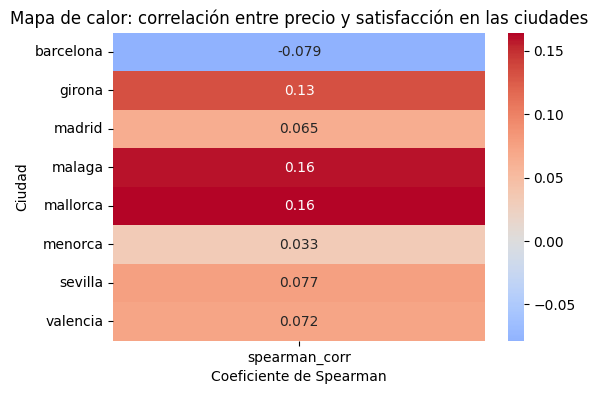

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

heat_df = city_corrs.pivot_table(index='city', values='spearman_corr')
plt.figure(figsize=(6, len(heat_df) * 0.5))
sns.heatmap(heat_df, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de calor: correlación entre precio y satisfacción en las ciudades")
plt.xlabel("Coeficiente de Spearman")
plt.ylabel("Ciudad")
plt.show()
